In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt

inflows = pd.read_parquet('Data/ucsd-inflows.pqt')
outflows = pd.read_parquet('Data/ucsd-outflows.pqt')

unique_inflow_consumers = inflows['prism_consumer_id'].unique()
unique_outflow_consumers = outflows['prism_consumer_id'].unique()
train_inflow_consumers, test_inflow_consumers = train_test_split(unique_inflow_consumers, test_size=0.2, random_state=1)
train_outflow_consumers, test_outflow_consumers = train_test_split(unique_outflow_consumers, test_size=0.2, random_state=1)

intrain = inflows[inflows['prism_consumer_id'].isin(train_inflow_consumers)]
intest = inflows[inflows['prism_consumer_id'].isin(test_inflow_consumers)]

outtrain = outflows[outflows['prism_consumer_id'].isin(train_outflow_consumers)]
outtest = outflows[outflows['prism_consumer_id'].isin(test_outflow_consumers)]

In the above code, the program randomly splits 20% of the users as testing data and 80% as training data. We also assign a random_state so that whenever we run the program we end up analysing the same set of randomized data.

The task is to test for bias in the split. The first test would be to check if categories of inflows/outflows are evenly ditributed between the two sets of data. Below we take the we have a table of percentages to see if the categories are similarly split between the datasets and as we can see it is, there is a very minimal difference as to what catagories were assigned to training and test data.

In [23]:
percent_category_intrain = intrain['category'].value_counts(normalize=True) * 100
percent_category_intest = intest['category'].value_counts(normalize=True) * 100

incategory_df = pd.DataFrame({
    'Inflow Train': percent_category_intrain,
    'Inflow Test': percent_category_intest,
})

incategory_df.fillna(0, inplace=True)
incategory_df

,Inflow Train,Inflow Test
category,,
EXTERNAL_TRANSFER,30.741977,29.538985
SELF_TRANSFER,20.906066,24.055975
DEPOSIT,11.837893,12.438044
MISCELLANEOUS,10.873132,10.730139
PAYCHECK,6.530859,6.159803
PAYCHECK_PLACEHOLDER,5.055969,5.199355
REFUND,4.778488,3.485479
INVESTMENT_INCOME,3.509346,2.830583
SMALL_DOLLAR_ADVANCE,2.631828,2.747975


In [24]:
percent_category_outtrain = outtrain['category'].value_counts(normalize=True) * 100
percent_category_outtest = outtest['category'].value_counts(normalize=True) * 100

outcategory_df = pd.DataFrame({
    'Outflow Train': percent_category_outtrain,
    'Outflow Test': percent_category_outtest,
})

outcategory_df.fillna(0, inplace=True)
outcategory_df

,Outflow Train,Outflow Test
category,,
ACCOUNT_FEES,1.450387,1.419093
ATM_CASH,4.588192,4.294417
AUTOMOTIVE,8.055723,7.927296
AUTO_LOAN,0.000048,0.000000
BILLS_UTILITIES,0.000529,0.002309
BNPL,0.066705,0.030210
CHILD_DEPENDENTS,0.039946,0.020396
CREDIT_CARD_PAYMENT,2.901929,2.926700
EDUCATION,0.174464,0.168175


Below we test to see if there are differences in the amount categories, and besides count and max statistic we do not see a differences. Before even analyzing the data, we knew the counts would be different as 80% is in training and 20% is in test, and we are not concerned with statistics such as max and min as they are only about 1 transaction. We also did K-S testing to see if there is a differences in distribution and with a p-value scores we have, we are confident that there is no difference. 

In [25]:
intrain_amount_summary = intrain['amount'].describe()
intest_amount_summary = intest['amount'].describe()

print("Amount Summary Statistics:")
print("Inflow Train Set:\n", intrain_amount_summary)
print("Inflow Test Set:\n", intest_amount_summary)


ks_inflow_train_test = ks_2samp(intrain['amount'], intest['amount'])

print(f"Inflow K-S test for 'amount':")
print(f"Inflow Train vs Inflow Test: p-value = {ks_inflow_train_test.pvalue}")

Amount Summary Statistics:
Inflow Train Set:
 count    4.126410e+05
mean     7.273829e+02
std      5.288169e+03
min      1.000000e-02
25%      2.001000e+01
50%      1.000000e+02
75%      5.000000e+02
max      1.154966e+06
Name: amount, dtype: float64
Inflow Test Set:
 count    100474.000000
mean        764.749907
std        5330.838302
min           0.010000
25%          22.000000
50%         100.000000
75%         500.000000
max      654853.210000
Name: amount, dtype: float64
Inflow K-S test for 'amount':
Inflow Train vs Inflow Test: p-value = 7.851469677070523e-09


In [26]:
outtrain_amount_summary = outtrain['amount'].describe()
outtest_amount_summary = outtest['amount'].describe()

print("Amount Summary Statistics:")
print("Outflow Train Set:\n", outtrain_amount_summary)
print("Outflow Test Set:\n", outtest_amount_summary)


ks_outflow_train_test = ks_2samp(outtrain['amount'], outtest['amount'])

print(f"K-S test for 'amount':")
print(f"  Train vs Test: p-value = {ks_outflow_train_test.pvalue}")

Amount Summary Statistics:
Outflow Train Set:
 count    2.077790e+06
mean     1.456348e+02
std      1.645497e+03
min      0.000000e+00
25%      9.680000e+00
50%      2.450000e+01
75%      6.723000e+01
max      4.808249e+05
Name: amount, dtype: float64
Outflow Test Set:
 count    519698.000000
mean        143.093660
std        1892.857765
min           0.000000
25%           9.440000
50%          23.560000
75%          63.970000
max      654853.210000
Name: amount, dtype: float64
K-S test for 'amount':
  Train vs Test: p-value = 3.9859580781375256e-51


Here there are two histograms showing the distribution of posted dates, and we can see that the training and test data are almost identical in distribution. These graphs were drawn to ensure that the dates were not heavily skewed in either dataset but rather they were relativly equal

/tmp/ipykernel_161/2979337553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intrain['posted_date'] = pd.to_datetime(intrain['posted_date'])
/tmp/ipykernel_161/2979337553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intest['posted_date'] = pd.to_datetime(intest['posted_date'])


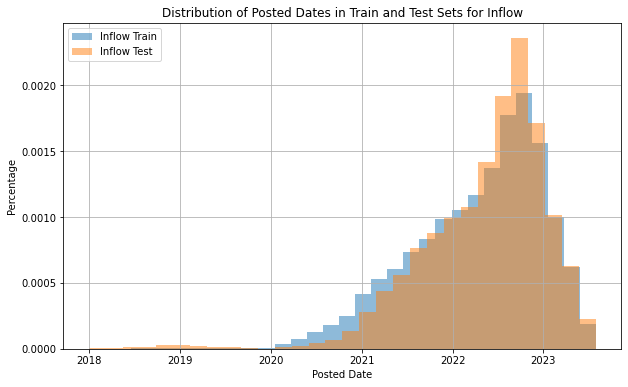

In [27]:
intrain['posted_date'] = pd.to_datetime(intrain['posted_date'])
intest['posted_date'] = pd.to_datetime(intest['posted_date'])

plt.figure(figsize=(10, 6))
intrain['posted_date'].hist(label='Inflow Train', bins=30, alpha=0.5, density=True)
intest['posted_date'].hist(label='Inflow Test', bins=30, alpha=0.5, density=True)

plt.title("Distribution of Posted Dates in Train and Test Sets for Inflow")
plt.xlabel("Posted Date")
plt.ylabel("Percentage")
plt.legend()
plt.show()

/tmp/ipykernel_161/1201179636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outtrain['posted_date'] = pd.to_datetime(outtrain['posted_date'])
/tmp/ipykernel_161/1201179636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outtest['posted_date'] = pd.to_datetime(outtest['posted_date'])


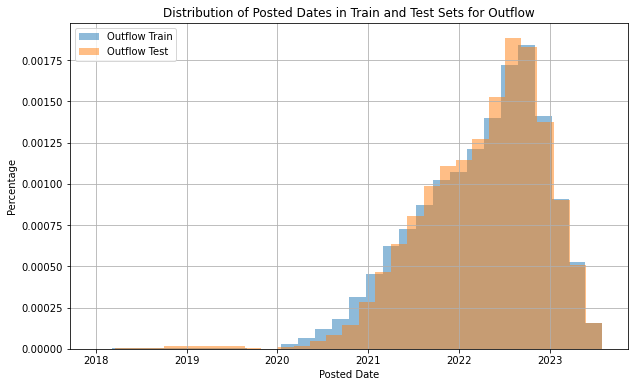

In [28]:
outtrain['posted_date'] = pd.to_datetime(outtrain['posted_date'])
outtest['posted_date'] = pd.to_datetime(outtest['posted_date'])

plt.figure(figsize=(10, 6))
outtrain['posted_date'].hist(label='Outflow Train', bins=30, alpha=0.5, density=True)
outtest['posted_date'].hist(label='Outflow Test', bins=30, alpha=0.5, density=True)

plt.title("Distribution of Posted Dates in Train and Test Sets for Outflow")
plt.xlabel("Posted Date")
plt.ylabel("Percentage")
plt.legend()
plt.show()

The code above split the dataset into train and testing and also proved that the distribution was even, so now any model developed can be used on these two datasets without problem.

This code does not account for the distribution of accounts, more explicitly, instead we seperate it based on user's. So if user 1 has 3 accounts, and they were assigned to training data, all 3 accounts are in training data, rather than allowing some accounts go to testing. 

The remaining question for this would be, is it better to resample and get a better distribution. For random_sample = 1, our pvalue score was ~7, would then random_sample = 3 be better as the pvalue is less than 7, or does it not provide much of a difference.